In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_data = pd.read_csv('linearly_sep.csv', names = ["x1", "x2", "type"])
input_data.head()

,x1,x2,type
0,3.948420,-0.319132,1
1,5.913813,0.125970,1
2,-0.013082,5.295910,-1
3,-0.193497,5.823372,-1
4,1.193963,5.395064,-1


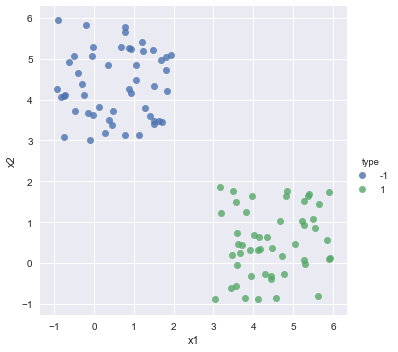

In [3]:
sns.lmplot("x1", "x2",data=input_data, ci = None, hue="type", fit_reg=False)

In [4]:
# %load svm_basic.py
from classifier import classifier
from svmMLiA import smoPK, calcWs
from numpy import dot as np_dot, nditer

class svm_basic(classifier):
    def __init__(self, c=1, toler=0.001, maxIter=50):
        self.alpha = None
        self.b = None
        self.w = None
        self.C = c
        self.toler = toler
        self.maxIter = maxIter

    def fit(self, X, Y):
        self.b, self.alpha = smoPK(X, Y, self.C, self.toler, self.maxIter)
        self.w = calcWs(self.alpha, X, Y)

    def predict(self, X):
        result = np_dot(self.w.T, X.T) + self.b
        for x in nditer(result, op_flags=['readwrite']):
            if x >= 0:
                x[...] = 1
            else:
                x[...] = -1
        return result


In [5]:
from svmMLiA import loadDataSet
from sklearn.model_selection import train_test_split
from pandas import DataFrame, concat

In [6]:
dataMat, labelMat = loadDataSet('linearly_sep.csv')
X_train, X_test, y_train, y_test = train_test_split(dataMat, labelMat, test_size=0.2, random_state=121)
model = svm_basic()
model.fit(X_train, y_train)
hypothesis = model.predict(X_test)

L==H
fullSet, iter: 0 i:0, pairs changed 0
fullSet, iter: 0 i:1, pairs changed 1
fullSet, iter: 0 i:2, pairs changed 2
fullSet, iter: 0 i:3, pairs changed 3
fullSet, iter: 0 i:4, pairs changed 3
fullSet, iter: 0 i:5, pairs changed 4
fullSet, iter: 0 i:6, pairs changed 4
fullSet, iter: 0 i:7, pairs changed 4
fullSet, iter: 0 i:8, pairs changed 4
fullSet, iter: 0 i:9, pairs changed 4
fullSet, iter: 0 i:10, pairs changed 4
fullSet, iter: 0 i:11, pairs changed 4
fullSet, iter: 0 i:12, pairs changed 4
fullSet, iter: 0 i:13, pairs changed 4
fullSet, iter: 0 i:14, pairs changed 4
fullSet, iter: 0 i:15, pairs changed 4
fullSet, iter: 0 i:16, pairs changed 4
j not moving enough
fullSet, iter: 0 i:17, pairs changed 4
fullSet, iter: 0 i:18, pairs changed 4
fullSet, iter: 0 i:19, pairs changed 4
fullSet, iter: 0 i:20, pairs changed 4
fullSet, iter: 0 i:21, pairs changed 4
fullSet, iter: 0 i:22, pairs changed 4
j not moving enough
fullSet, iter: 0 i:23, pairs changed 4
fullSet, iter: 0 i:24, pairs 

In [7]:
df_x_test = DataFrame(X_test, columns = ["x1", "x2"])
df_hypo = DataFrame(hypothesis.T, columns = ["type"])

In [8]:
hypo_data = concat([df_x_test, df_hypo], axis=1)
hypo_data.head()

,x1,x2,type
0,4.846514,1.772123,1.0
1,0.933640,5.224675,-1.0
2,0.874154,5.254460,-1.0
3,4.455876,-0.309145,1.0
4,1.495002,3.398053,-1.0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

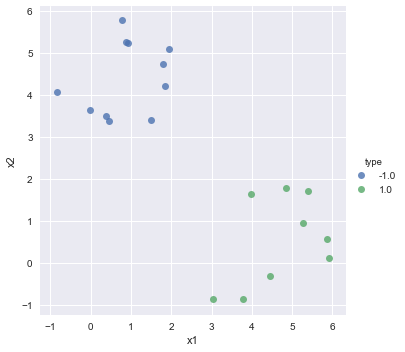

In [10]:
sns.lmplot("x1", "x2",data=hypo_data, ci = None, hue="type", fit_reg=False)